In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [2]:
data = pd.read_csv("left.csv")
data.to_csv('left1.csv', header = False)
data = pd.read_csv("left1.csv")

In [3]:
data1 = pd.read_csv("right.csv")
data1.to_csv('right1.csv', header = False)
data1 = pd.read_csv("right1.csv")

In [4]:
channels = ['EEG.AF3','EEG.F7','EEG.F3','EEG.FC5','EEG.T7','EEG.P7','EEG.O1','EEG.O2','EEG.P8','EEG.T8','EEG.FC6','EEG.F4','EEG.F8','EEG.AF4']

In [5]:

indices = np.linspace(0, data['EEG.AF3'].size, 5+1, dtype=int)
sum1 = np.zeros(14)
sum2 = np.zeros(14)
for i in range(5):
    XLeftdash = data[channels].iloc[indices[i] : indices[i+1]].to_numpy()
    XRightdash = data1[channels].iloc[indices[i] : indices[i+1]].to_numpy()
    XLeft = np.transpose(XLeftdash)
    XRight = np.transpose(XRightdash)
    product_left = np.matmul(XLeft,XLeftdash)
    product_right = np.matmul(XRight,XRightdash)
    R_left = product_left / np.trace(product_left)
    R_right = product_right / np.trace(product_right)
    sum1 = np.add(sum1,R_left)
    sum2 = np.add(sum2,R_right)
R_left_avg = sum1/5
R_right_avg = sum2/5

In [6]:
R = R_left_avg + R_right_avg
w, v = LA.eig(R)

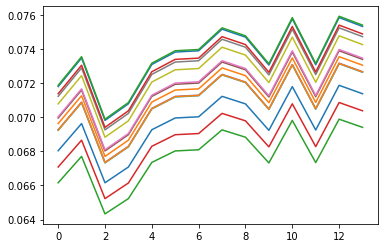

In [7]:
plt.plot(R_left)

In [8]:
"""
XLeftdash = data[channels].iloc[indices[i] : indices[i+1]].to_numpy()
XRightdash = data1[channels].iloc[indices[i] : indices[i+1]].to_numpy()
XLeft = np.transpose(XLeftdash)
XRight = np.transpose(XRightdash)
"""

'\nXLeftdash = data[channels].iloc[indices[i] : indices[i+1]].to_numpy()\nXRightdash = data1[channels].iloc[indices[i] : indices[i+1]].to_numpy()\nXLeft = np.transpose(XLeftdash)\nXRight = np.transpose(XRightdash)\n'

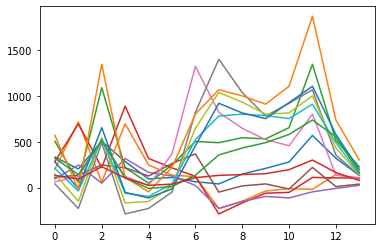

In [9]:
plt.plot(np.cov(XLeft))

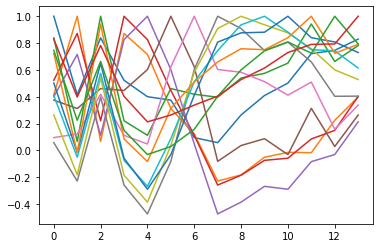

In [10]:
plt.plot(np.corrcoef(XLeft))

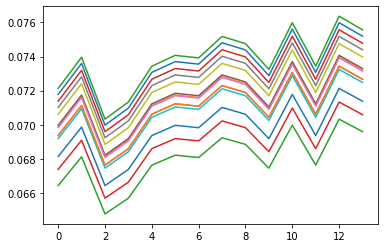

In [11]:
plt.plot(R_left_avg)

In [32]:
"""
indices = np.linspace(0, data['EEG.AF3'].size, 5+1, dtype=int)
sum1 = np.zeros(14)
sum2 = np.zeros(14)
for i in range(5):
    XLeftdash = data[channels].iloc[indices[i] : indices[i+1]].to_numpy()
    XRightdash = data1[channels].iloc[indices[i] : indices[i+1]].to_numpy()
    XLeft = np.transpose(XLeftdash)
    XRight = np.transpose(XRightdash)
    R_left1 = np.corrcoef(XLeft)
    R_right = np.corrcoef(XRight)
    sum1 = np.add(sum1,R_left)
    sum2 = np.add(sum2,R_right)
R_left_avg = sum1/5
R_right_avg = sum2/5
"""


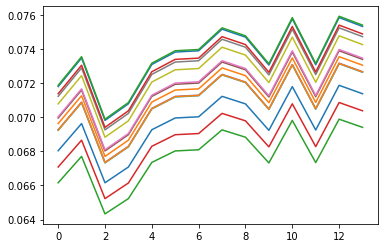

In [12]:
plt.plot(R_left)

In [13]:
tmp = np.dot(v, np.diag(1 / np.sqrt(w)))

In [14]:
a = np.dot(tmp, v)

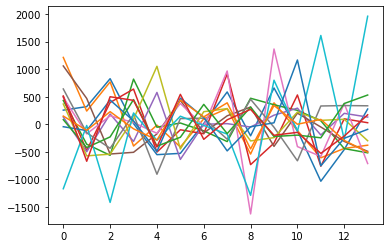

In [17]:
plt.plot(a)